# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [2]:
m=2
c=3
x=np.linspace(0,50,100)
y=m*x+c

In [3]:
noise=np.random.normal(0,5,size=y.shape)
y_noise=y+noise
y_noise

array([  1.58966289, -10.891912  ,   9.53505465,  -4.59192037,
         5.17107756,   2.29931065,   3.50277482,   1.47195432,
        16.53738063,  11.67535465,  17.2760899 ,  17.80875334,
        10.20351301,  14.85694476,  11.02031848,  11.95780004,
        27.6849639 ,  21.1053521 ,  15.14344682,  19.95210788,
        24.72480921,  29.46599576,  24.37167358,  19.6817949 ,
        27.85302914,  24.2733361 ,  29.25442649,  29.46417525,
        24.36365445,  33.17753803,  38.35435483,  31.91888462,
        37.2203523 ,  41.41063483,  34.72738709,  41.52512997,
        39.7245758 ,  32.74286279,  39.07910507,  45.03325323,
        47.20690102,  31.76145235,  39.57391495,  57.61390519,
        39.2956342 ,  56.31214197,  52.04944906,  47.50286926,
        46.20872147,  60.86433038,  56.055066  ,  55.66442126,
        60.12901061,  54.33217069,  59.22083265,  52.65455685,
        69.62874333,  64.40929588,  66.78537049,  63.33322368,
        57.01970306,  69.66321239,  64.96496009,  64.27

In [ ]:
data={'Numbers':x,
      'Output':y_noise}
      
df=pd.DataFrame(data)
df


,Numbers,Output
0,0.000000,1.589663
1,0.505051,-10.891912
2,1.010101,9.535055
3,1.515152,-4.591920
4,2.020202,5.171078
...,...,...
95,47.979798,94.212624
96,48.484848,99.655897
97,48.989899,99.901638
98,49.494949,106.601368


In [9]:
# Defining the feature(independent variable) and target(dependent variable)
X=df[['Numbers']]
y=df['Output'] 

<Axes: xlabel='Numbers', ylabel='Count'>

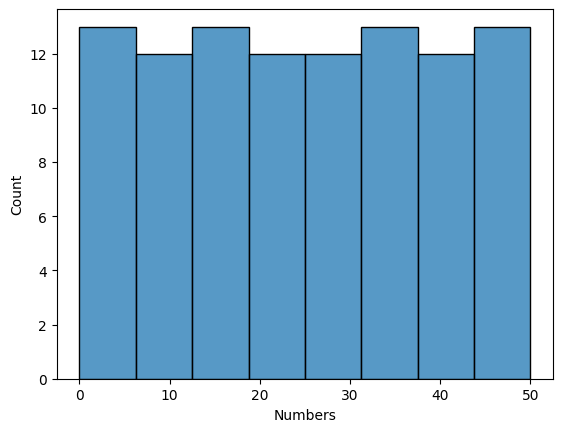

In [13]:
sns.histplot(x=X['Numbers'])

In [11]:
# Split Training and Teasting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',y_test.shape)


X_train shape: (80, 1)
X_test shape: (20, 1)
y_train shape: (80,)
X_test shape: (20,)


In [ ]:
# Fit a Simple Linear Regression model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
# learned coefficient and intercept
print('coefficient (m) =',model.coef_[0])
print('intercept (c) =',model.intercept_)

coefficient (m) = 2.0837789207991992
intercept (c) = 0.6837673902022203


In [17]:
# Make predictions
y_train_predictions=model.predict(X_train)
y_test_predction=model.predict(X_test)
print('y train predictions:',y_train_predictions)
print('y test predictions:',y_test_predction)

y train predictions: [ 58.56651519  93.29616387  28.0465209   44.88513844  73.30030554
  16.46997134  42.78031124 101.71547264  10.15548976  76.45754633
  12.26031695  50.14720642  90.13892308  30.15134809  98.55823185
   5.94583537  70.14306475  69.09065115  37.51824326  17.52238493
  52.25203361  36.46582967   8.05066256 100.66305904  29.09893449
  20.67962572  85.9292687   26.9941073   65.93341036  14.36514414
  25.9416937    3.84100818  18.57479853  40.67548405   9.10307616
  82.77202791   6.99824897  68.03823756  38.57065686  94.34857747
  59.61892879 104.87271343  57.51410159  45.93755203  53.30444721
  71.19547835  49.09479282  72.24789194  64.88099677 102.76788624
  83.8244415   43.83272484  61.72375598  51.19962002 103.82029983
  60.67134238  79.61478712  34.36100247  99.61064545  62.77616958
  66.98582396  89.08650948  39.62307046  31.20376168   1.73618099
  55.4092744   22.78445291   2.78859458  24.88928011  92.24375027
  96.45340466  78.56237352  91.19133668  86.98168229  2

In [18]:
# Evaluate both train and test using MAE, MSE, RMSE, R² score
print("Train MAE:", mean_absolute_error(y_train, y_train_predictions))
print("Train MSE:", mean_squared_error(y_train, y_train_predictions))
print("Train RMSE:", root_mean_squared_error(y_train, y_train_predictions))
print("Train R²:", r2_score(y_train, y_train_predictions))

Train MAE: 4.30084600002902
Train MSE: 27.974279974360748
Train RMSE: 5.28907174978377
Train R²: 0.9705856094395545


In [19]:
print("Test MAE:", mean_absolute_error(y_test, y_test_predction))
print("Test MSE:", mean_squared_error(y_test, y_test_predction))
print("Test RMSE:", root_mean_squared_error(y_test, y_test_predction))
print("Test R²:", r2_score(y_test, y_test_predction))

Test MAE: 4.697032656182538
Test MSE: 29.667702961397357
Test RMSE: 5.446806675603363
Test R²: 0.9630462696793454


Model achived R2 score equal (0.970) on the training set and (0.963) on the testing set and almost similar MAE and MSE on both training and testing sets.
These results indicate that the model fits the data well in the best possible way, capturing the linear relationship accurately.

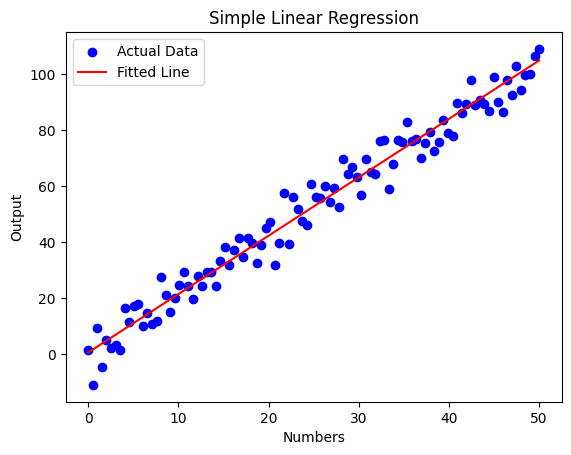

In [25]:
plt.scatter(X,y_noise,color='blue',label='Actual Data')
plt.plot(X, model.predict(X),color='red',label='Fitted Line')
plt.title('Simple Linear Regression')
plt.xlabel('Numbers')
plt.ylabel('Output')
plt.legend()
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [38]:
a1,a2,a3,c=1.2,0.8,1.5,5
X = np.random.rand(100, 3) * 10
x1=X[:,0]
x2=X[:,1]
x3=X[:,2]
y=a1*x1+a2*x2+a3*x2+c
noise=np.random.normal(0,5,size=y.shape)
y_noise2=y+noise

In [39]:
data={'X1':x1,
      'X2':x2,
      'X3':x3,
      'Output':y}
df=pd.DataFrame(data)
df

,X1,X2,X3,Output
0,8.716164,2.529196,4.213061,21.276548
1,3.077597,1.851294,4.302664,12.951094
2,5.986002,4.831534,8.005892,23.295731
3,0.420251,0.107018,3.261362,5.750442
4,3.393469,9.004399,6.275208,29.782282
...,...,...,...,...
95,2.409714,2.736004,9.949833,14.184465
96,3.612460,0.389041,7.094333,10.229746
97,8.447495,8.729107,7.892670,35.213940
98,5.468669,3.953411,0.166534,20.655248


In [31]:
# Defining the features(independent variables) and target(dependent variable)
X=df[['X1','X2','X3']]
y=df['Output']

In [40]:
# Splitting data into train and test splits
X_train_mul,X_test_mul,y_train_mul,y_test_mul=train_test_split(X,y,test_size=0.2,random_state=42)
print('X_train_mul shape:',X_train_mul.shape)
print('X_test_mul shape:',X_test_mul.shape)
print('y_train_mul shape:',y_train_mul.shape)
print('y_test_mul shape:',y_test_mul.shape)

X_train_mul shape: (80, 3)
X_test_mul shape: (20, 3)
y_train_mul shape: (80,)
y_test_mul shape: (20,)


In [41]:
# Fit a Multiple Linear Regression model
model2=LinearRegression()
model2.fit(X_train_mul,y_train_mul)

LinearRegression()

In [42]:
# Make predictions
y_train_mul_pred=model2.predict(X_train_mul)
y_test_mul_pred=model2.predict(X_test_mul)
print('y_train_mul_prediction:\n',y_train_mul_pred)
print('y_test_mul_prediction:\n',y_test_mul_pred)

y_train_mul_prediction:
 [ 9.55149394 31.42515298 33.13474403 15.93455603 22.4877194  17.38731384
 13.84848202 10.22974643 28.93163596 28.85041264 27.14981446 18.11983047
 12.95441513 34.78640322 31.96188545 20.31022288 24.04918613 12.03362602
 22.41675035 32.14995353 13.43090029  7.73949275 16.74047327 14.18446484
 25.16171677 20.50427576 27.98679366 21.91518268 29.62778627 16.63069632
  9.18255927  5.75044222 26.28104537 15.55153961 22.74571519 27.78767942
 10.36688586  6.41495069 37.48986917 30.68955243  7.70139811 26.4227617
 27.42546482 20.3915654  31.90085311 17.58736735 31.22794024 31.40371617
 14.326444   35.21393952 33.71419647 14.38838736 21.58144605 11.99820119
 20.65524812 16.46029485 22.71240115 12.60424425 28.25826387 14.15174901
 29.07119106 23.2676234  21.77302251 25.91655748 12.95109357 29.98039799
 22.32848594 23.29573088 18.86122777  7.38529916 12.94858637 16.98577267
 30.15686184 22.61633344 21.82792692 24.96286969 27.83077272 20.56666492
 31.29505567 10.70271665]
y

In [43]:
# coefficients and intercept
print('coefficients:',model2.coef_)
print('intercept:',model2.intercept_)

coefficients: [1.2000000e+00 2.3000000e+00 4.4408921e-16]
intercept: 4.999999999999986


In [44]:
# Evaluate both train and test using MAE, MSE, RMSE, R² score
print("Train MAE:", mean_absolute_error(y_train_mul, y_train_mul_pred))
print("Train MSE:", mean_squared_error(y_train_mul, y_train_mul_pred))
print("Train RMSE:", root_mean_squared_error(y_train_mul, y_train_mul_pred))
print("Train R²:", r2_score(y_train_mul, y_train_mul_pred))

Train MAE: 1.1712852909795402e-14
Train MSE: 1.4291201374210155e-28
Train RMSE: 1.1954581286774604e-14
Train R²: 1.0


In [46]:
print("Test MAE:", mean_absolute_error(y_test_mul,y_test_mul_pred))
print("Test MSE:", mean_squared_error(y_test_mul, y_test_mul_pred))
print("Test RMSE:", root_mean_squared_error(y_test_mul, y_test_mul_pred))
print("Test R²:", r2_score(y_test_mul, y_test_mul_pred))

Test MAE: 1.1679546219056647e-14
Test MSE: 1.432965834333968e-28
Test RMSE: 1.1970655096250865e-14
Test R²: 1.0


Model achived R2 score equal (1.0) on the training set and (1.0) on the testing set and almost similar MAE and MSE on both training and testing sets

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [75]:
a,b=2.5,0.5
np.random.seed(42)
X = np.random.rand(100, 1) * 10 + np.random.randn(100, 1) * 2
y = a * X**2 + b * X + np.random.randn(100, 1) * 40

In [83]:
# Split data into training and test sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly= train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
from sklearn.preprocessing import PolynomialFeatures
poly_features= PolynomialFeatures(degree=5)
X_train_poly_after=poly_features.fit_transform(X_train_poly)
X_test_poly_after=poly_features.transform(X_test_poly)

model_poly=LinearRegression()
model_poly.fit(X_train_poly_after,y_train_poly)

LinearRegression()

In [92]:
# Make predictions
y_train_poly_pred=model_poly.predict(X_train_poly_after)
y_test_poly_pred=model_poly.predict(X_test_poly_after)
print('y train poly prediction:\n',y_train_poly_pred[:10])
print('y test poly prediction:\n',y_test_poly_pred[:10])

y train poly prediction:
 [[ 2.13057284e+02]
 [ 2.72498403e+02]
 [-2.80856647e-01]
 [ 4.21609754e+00]
 [ 3.07869134e+02]
 [ 2.41129691e+01]
 [ 4.94297124e-01]
 [ 6.12301142e+01]
 [ 9.60142592e+01]
 [ 8.00020314e-01]]
y test poly prediction:
 [[-6.15668550e-01]
 [ 1.63263648e+02]
 [ 6.70473362e+01]
 [ 5.26856739e+01]
 [ 3.41173557e+01]
 [ 5.89987650e+01]
 [ 8.09609158e+00]
 [ 3.80543536e+02]
 [-2.98346870e-01]
 [ 2.76686664e+01]]


In [93]:
# Evaluate both train and test using MAE, MSE, RMSE, R² score
print("Train MAE:", mean_absolute_error(y_train_poly, y_train_poly_pred))
print("Train MSE:", mean_squared_error(y_train_poly, y_train_poly_pred))
print("Train RMSE:", root_mean_squared_error(y_train_poly, y_train_poly_pred))
print("Train R²:", r2_score(y_train_poly, y_train_poly_pred))

Train MAE: 31.80762969639492
Train MSE: 1499.5098153521867
Train RMSE: 38.72350468839548
Train R²: 0.8246276234678978


In [94]:
print("Test MAE:", mean_absolute_error(y_test_poly,y_test_poly_pred))
print("Test MSE:", mean_squared_error(y_test_poly, y_test_poly_pred))
print("Test RMSE:", root_mean_squared_error(y_test_poly, y_test_poly_pred))
print("Test R²:", r2_score(y_test_poly, y_test_poly_pred))

Test MAE: 47.896064122112875
Test MSE: 3596.3629758565426
Test RMSE: 59.969683806541305
Test R²: 0.7519678608296118


The difference between train and test refers to overfitting in model.

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [1]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

C:\Users\speedlink\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\speedlink\.cache\kagglehub\datasets\rohitgrewal\airlines-flights-data\versions\1


In [2]:
os.listdir(path)

['airlines_flights_data.csv']

In [3]:
full_path = os.path.join(path,os.listdir(path)[0])

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

In [5]:
data = pd.read_csv(full_path)

In [6]:
data

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
data['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [9]:
data.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [10]:
# The Minimum Duration value
data[data['duration']==0.830000]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115869,115869,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,6,3498
115943,115943,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,7,3498
116010,116010,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,8,3498
116081,116081,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,9,3498
116163,116163,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,10,3498
116236,116236,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,11,3498
116322,116322,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,12,3498
116411,116411,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,13,3498
116496,116496,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,14,3498
116656,116656,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,16,1924


In [11]:
# The Maximum Duration value
data[data['duration']==49.830000]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [12]:
data.drop(columns='index',inplace=True)

In [13]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [14]:
# Checking for the missing values
data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

No Missing Values

In [15]:
# Checking for the duplicates values
data.duplicated().sum()

np.int64(0)

No Duplicated Values

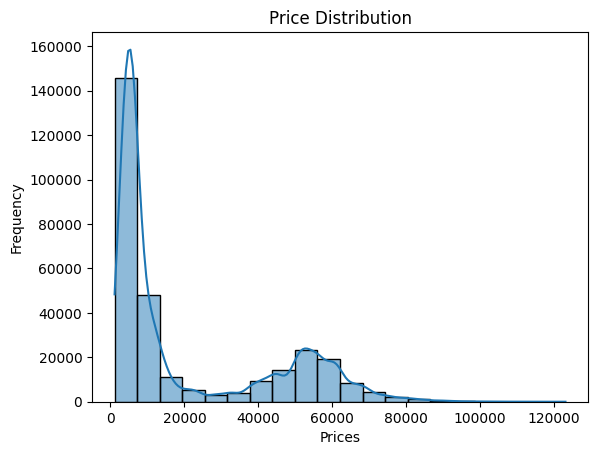

In [16]:
sns.histplot(data=data,x='price',bins=20,kde=True)
plt.title('Price Distribution')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.show()

Right skewed data

In [42]:
data['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

<Axes: xlabel='days_left', ylabel='Count'>

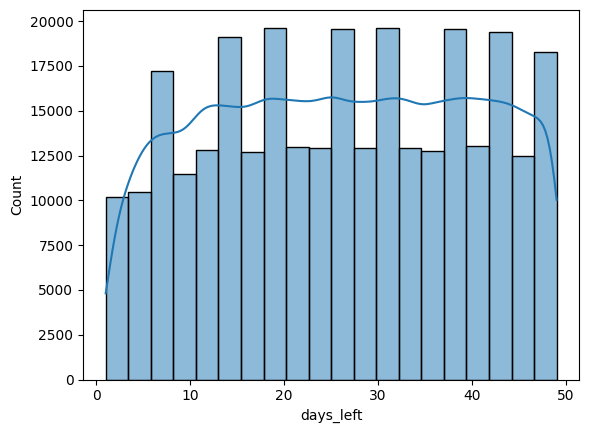

In [45]:
sns.histplot(data=data,x='days_left',bins=20,kde='True')

The Days left is almost uniformly distributed acrossthe range 0-50.

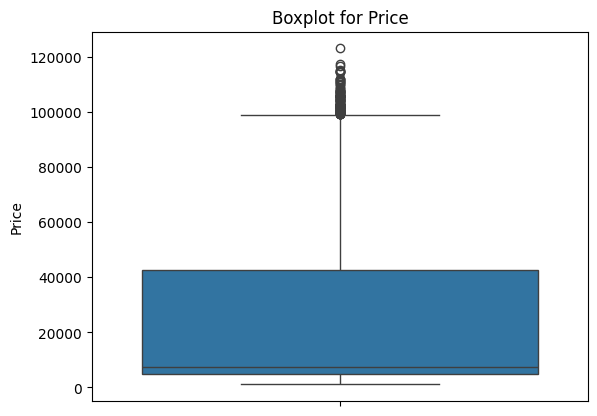

In [53]:
sns.boxplot(data=data,y='price')
plt.title('Boxplot for Price')
plt.ylabel('Price')
plt.show()

Most prices ranges between 10000-40000 , and there are some outliers above 100000 going up to 120000. 

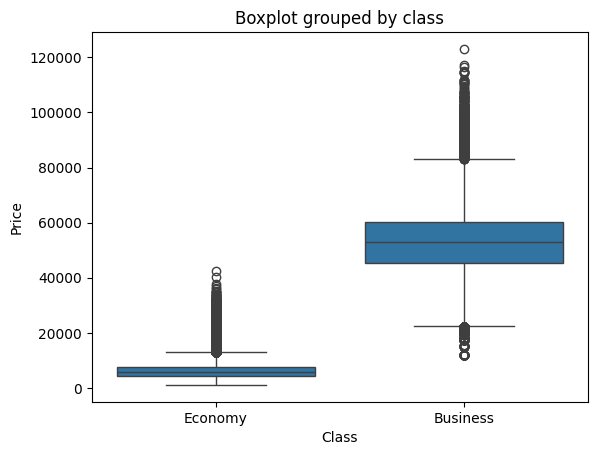

In [54]:
sns.boxplot(data=data,y='price',x='class')
plt.title('Boxplot grouped by class')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

The Economy class has a small range of prices compared to the Business class that has a big range of price.
The Economy class has outliers almost above 18000 and the Business class has outliers almost above 81000 and under 22000.

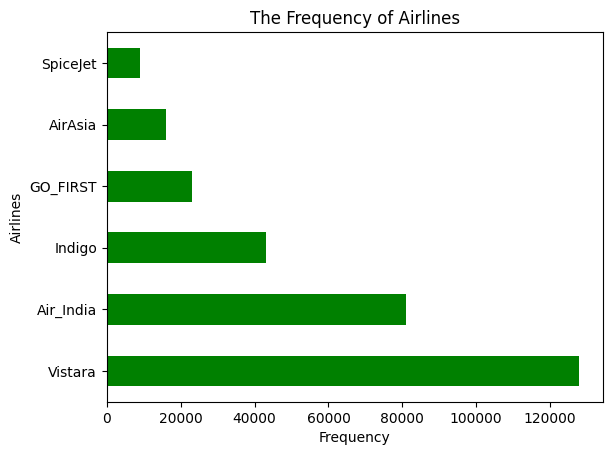

In [17]:
data['airline'].value_counts().plot.barh(color='green')
plt.title('The Frequency of Airlines')
plt.xlabel('Frequency')
plt.ylabel('Airlines')
plt.show()

The 'Vistara' airline has the highest rate among others airlines followed by 'Air_India'. 

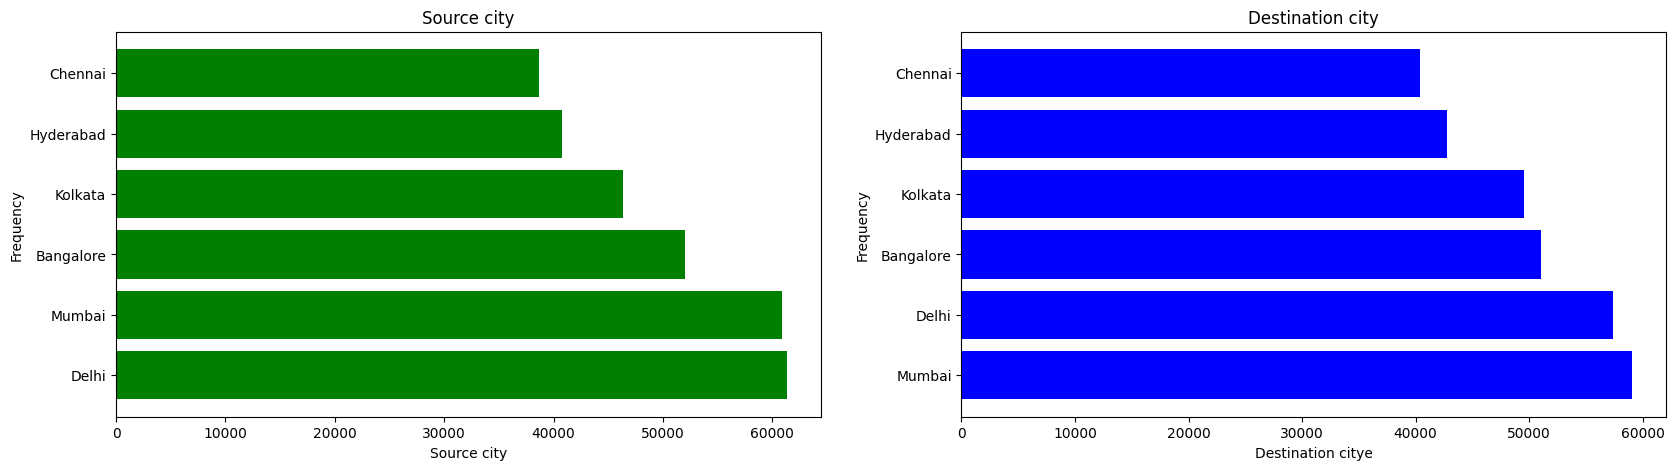

In [18]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
x2=data['source_city'].value_counts().index
y2=data['source_city'].value_counts().values
plt.barh(x2,y2, color ='green')
plt.title("Source city")
plt.xlabel("Source city")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
x3=data['destination_city'].value_counts().index
y3=data['destination_city'].value_counts().values
plt.barh(x3,y3, color ='blue')
plt.title("Destination city")
plt.xlabel("Destination citye")
plt.ylabel("Frequency")
plt.show()

The 'Delhi' source city has the highest rate among others source cities followed by 'Mumbai'.
The 'Night' destination city has the highest rate among others destination cities followed by 'Delhi'.

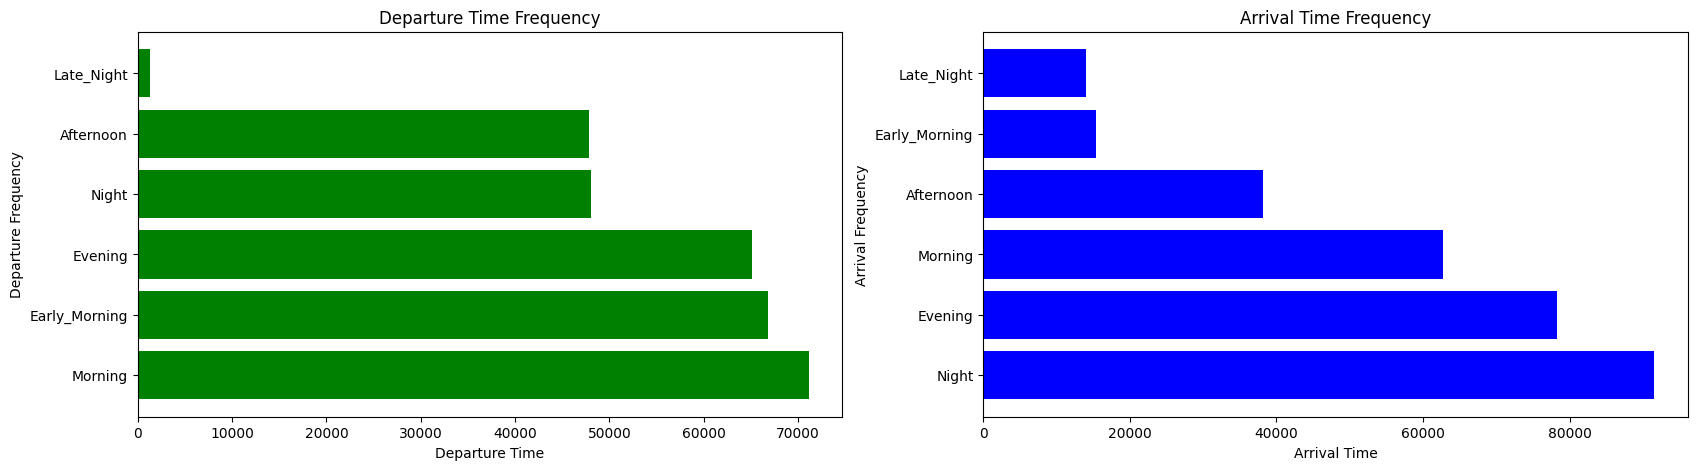

In [19]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
x=data['departure_time'].value_counts().index
y=data['departure_time'].value_counts().values
plt.barh(x,y, color ='green')
plt.title("Departure Time Frequency")
plt.xlabel("Departure Time")
plt.ylabel("Departure Frequency")

plt.subplot(1,2,2)
x1=data['arrival_time'].value_counts().index
y1=data['arrival_time'].value_counts().values
plt.barh(x1,y1, color ='blue')
plt.title("Arrival Time Frequency")
plt.xlabel("Arrival Time")
plt.ylabel("Arrival Frequency")
plt.show()

The 'Morning' departure time has the highest rate among others departure times followed by 'Early_morning' followed by 'Evening'. 
The 'Night' arrival time has the highest rate among others arrival times followed by 'Evening' followed by 'Morning'.

In [20]:
airline_price_grouped=data.groupby('airline')['price'].mean().reset_index()
airline_price_grouped

,airline,price
0,AirAsia,4091.072742
1,Air_India,23507.019112
2,GO_FIRST,5652.007595
3,Indigo,5324.216303
4,SpiceJet,6179.278881
5,Vistara,30396.536302


<Axes: xlabel='airline', ylabel='price'>

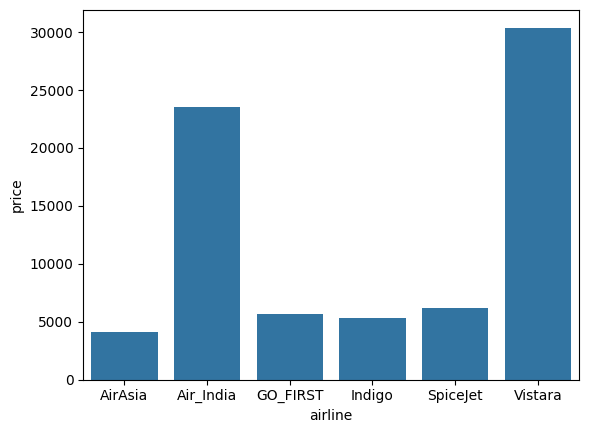

In [21]:
sns.barplot(data=airline_price_grouped,x='airline',y='price')

The 'Vistara' airline has higher price than other airlines folloewd by 'Air_India'.

In [22]:
class_price_grouped=data.groupby('class')['price'].mean().reset_index()
class_price_grouped

,class,price
0,Business,52540.081124
1,Economy,6572.342383


<Axes: xlabel='class', ylabel='price'>

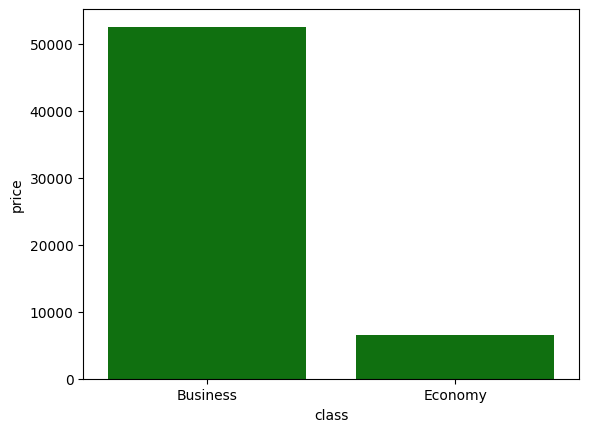

In [23]:
sns.barplot(data=class_price_grouped,x='class',y='price',color='green')

The average of price for businessclass is higher than the average to economy class.

In [24]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

<Axes: xlabel='airline', ylabel='price'>

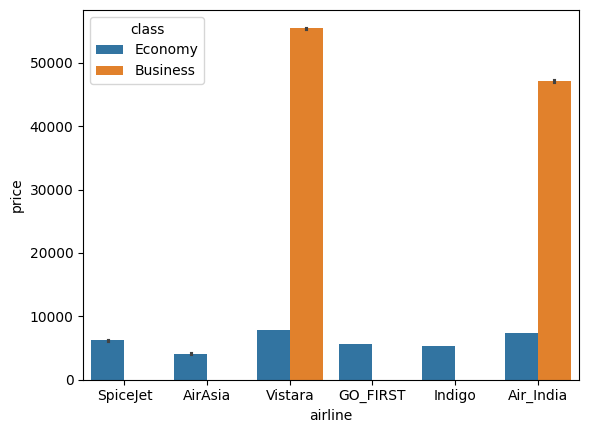

In [25]:
sns.barplot(data=data,x='airline',y='price',hue='class')

The business vistara airline has higher price than others followed by business air_india airline.

In [55]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

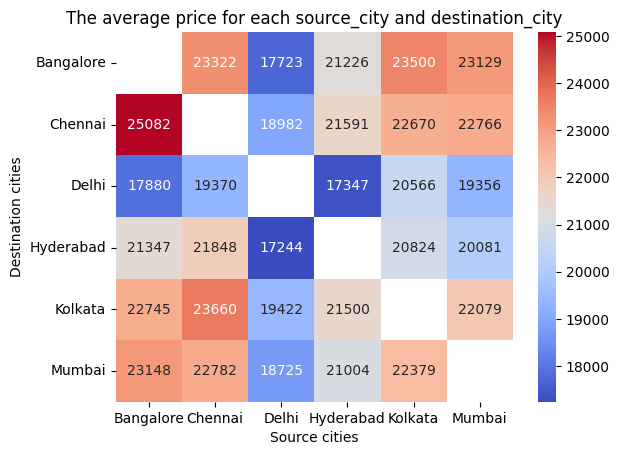

In [59]:
pivot=data.pivot_table(values='price',index='source_city',columns='destination_city',aggfunc='mean')
sns.heatmap(pivot,annot=True,fmt='.0f',cmap='coolwarm')
plt.title('The average price for each source_city and destination_city')
plt.xlabel('Source cities')
plt.ylabel('Destination cities')
plt.show()

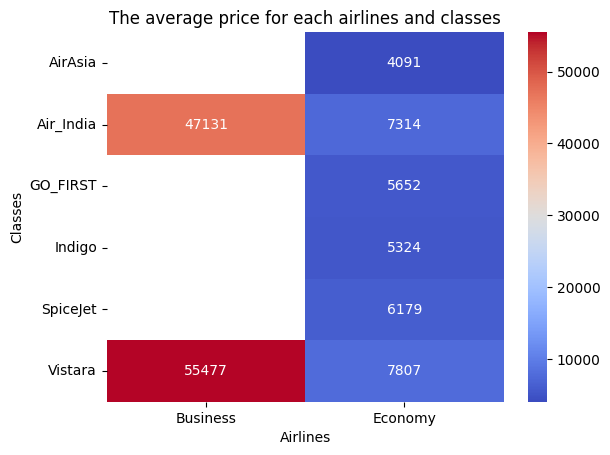

In [62]:
pivot2=data.pivot_table(values='price',index='airline',columns='class',aggfunc='mean')
sns.heatmap(pivot2,annot=True,fmt='.0f',cmap='coolwarm')
plt.title('The average price for each airlines and classes')
plt.xlabel('Airlines')
plt.ylabel('Classes')
plt.show()

The business vistara airline has higher price than others followed by business air_india airline.

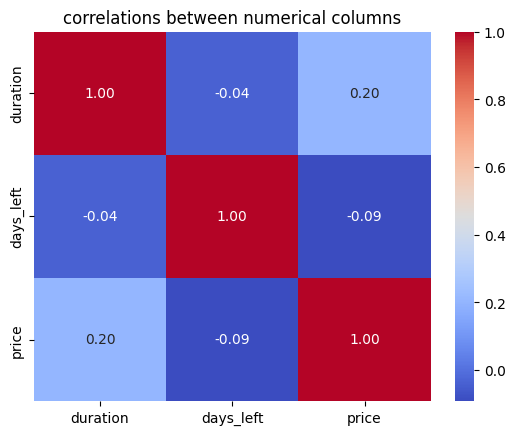

In [64]:
numeric_columns=data.select_dtypes(include=['float64','int64'])
correlation_matrix=numeric_columns.corr()
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('correlations between numerical columns')
plt.show()

The duration column and price column have a weak direct correlations and other columns have an inverse correlation.

In [26]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [27]:
# Splitting Features(independeny=t variables) and Target(dependent variable)
X=data[['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left']]
y=data['price']

In [28]:
X

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49


In [29]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print('X train shape:',X_train.shape)
print('X test shape:',X_test.shape)
print('y train shape:',y_train.shape)
print('y test shape:',y_test.shape)

X train shape: (240122, 10)
X test shape: (60031, 10)
y train shape: (240122,)
y test shape: (60031,)


In [31]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [32]:
numerical_features=['duration','days_left']
nominal_features=['airline','source_city','destination_city']
ordinal_features=['departure_time','class','stops']

In [33]:
preprocessing=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_features),
        ('cat',OneHotEncoder(),nominal_features),
        ('ordinal',OrdinalEncoder(),ordinal_features)
    ],
    remainder='drop'
)

In [34]:
X_train_transformed=preprocessing.fit_transform(X_train)
X_test_transformed=preprocessing.transform(X_test)

In [35]:
model=LinearRegression()
model.fit(X_train_transformed,y_train)

LinearRegression()

In [36]:
y_train_pred=model.predict(X_train_transformed)
y_test_pred=model.predict(X_test_transformed)
print('y train prediction:\n',y_train_pred[:10])
print('y test prediction:\n',y_test_pred[:10])

y train prediction:
 [11196.49424269  4650.53353485 50907.47832835 10763.74813619
 60710.13539316  8492.97629623  8290.18103298 56341.39462123
  8360.56439895  7174.23369071]
y test prediction:
 [ 5134.54150298 54427.4563491  10238.13112349 55202.88073681
  6751.72190569 11162.09273628 50261.01357944  6968.49739897
 49474.86496316 58933.92133282]


In [37]:
# Evaluate both train and test using MAE, MSE, RMSE, R² score
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train RMSE:", root_mean_squared_error(y_train, y_train_pred))
print("Train R²:", r2_score(y_train, y_train_pred))

Train MAE: 4612.513427262103
Train MSE: 47210922.15650046
Train RMSE: 6871.020459618823
Train R²: 0.9083484313620701


In [38]:
print("Test MAE:", mean_absolute_error(y_test,y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test RMSE:", root_mean_squared_error(y_test, y_test_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

Test MAE: 4591.833278957443
Test MSE: 47273293.30610777
Test RMSE: 6875.557672371585
Test R²: 0.9082930767360486


Model achived R2 score equal (0.9083) on the training set and (0.9082) on the testing set, almost similar MAE(4612.51) on the training set and (4591.83) on the testing set and 
MSE (47210922.15) on the training set and (47273293.30) on the testing set.
These results indicate that the model fits the data well in the best possible way, capturing the linear relationship accurately.

In [66]:
import joblib
joblib.dump(model,'Regression_model.pkl')
print("Model saved as 'Regression_model.pkl'")

Model saved as 'Regression_model.pkl'


## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*
